In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('creditcard-training set v2.csv')
print(df.shape)
df.head()

(227844, 32)


,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [4]:
df.rename(inplace=True, columns={
    'Seconds since reference time':'Time',
    'Fraud? (1: Fraud, 0:  No Fraud)':'Fraud?'
})
df.head()

,Time,Amount,Fraud?,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


Text(0,0.5,'Frequency')

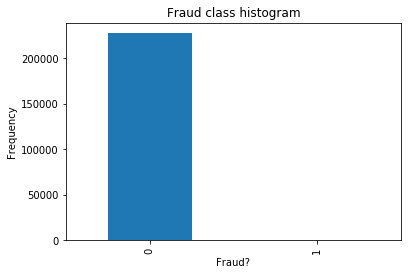

In [5]:
count_classes = pd.value_counts(df['Fraud?'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Fraud?")
plt.ylabel("Frequency")

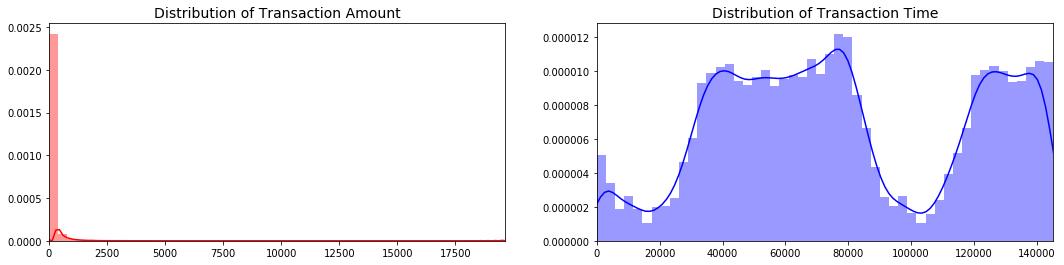

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
https://towardsdatascience.com/getting-started-with-graph-analysis-in-python-with-pandas-and-networkx-5e2d2f82f18e

Undersampling data (50/50)

Assumption 1: Timing does not matter as the fraud can occur at random times

In [7]:
df.head()

,Time,Amount,Fraud?,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers, scaling amount and time to range (-1,1)
df['normAmount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['normTime'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1, inplace=True)

# Changing position to the front
scaled_amount = df['normAmount']
scaled_time = df['normTime']

df.drop(['normAmount', 'normTime'], axis=1, inplace=True)
df.insert(0, 'normAmount', scaled_amount)
df.insert(1, 'normTime', scaled_time)

# Amount and Time are Scaled!

df.head()

,normAmount,normTime,Fraud?,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,1.705906,-1.007689,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,-0.279903,-1.007689,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,4.801460,-1.007675,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1.352886,-1.007675,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,0.629680,-1.007661,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [9]:
# shuffling
df = df.sample(frac=1)

# amount of fraud cases is 417
fraud_df = df.loc[df['Fraud?'] == 1]
non_fraud_df = df.loc[df['Fraud?'] == 0][:417]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,normAmount,normTime,Fraud?,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
123264,0.089201,0.049586,0,-0.269883,-0.104647,0.161261,-0.601181,0.460485,-0.051588,-0.224035,...,-0.385102,-0.642532,0.064343,11.485564,-0.495633,-0.297785,0.430075,-0.840261,-0.453915,1.244763
167976,-0.262198,0.629089,0,-0.608107,-0.117699,-0.392098,-0.282572,1.017353,-0.217946,-0.238443,...,-0.932313,0.014075,-0.183968,1.138838,0.537299,-0.666859,0.799873,0.587451,-0.081360,0.808331
149587,-0.302744,0.251204,1,-0.968553,1.854772,6.024397,3.531250,-1.196285,-0.230640,-0.474437,...,-1.583851,0.653745,-0.192892,-3.514478,-4.704509,-1.015792,-3.918200,3.504568,-2.829098,1.217608
184993,0.145425,0.732029,0,0.670649,0.682515,-0.763499,-0.159601,0.253298,-0.116223,-0.307862,...,0.026835,-0.510373,0.050941,-8.387236,-0.009351,-0.229750,-0.147604,-1.540896,-0.002786,1.137746
88876,-0.302744,-0.150353,1,0.421013,0.866441,4.082485,1.196318,-1.100764,-0.067712,-0.377597,...,-0.981223,0.325714,-0.037721,2.419412,-4.861867,-0.523377,-0.468572,0.915947,-2.126973,0.113219


In [10]:
# remove null values
df.dropna(inplace=True)
df.shape

(227762, 32)

In [11]:
X = df.drop('Fraud?', axis=1)
y = df['Fraud?']


y.head()

108246    0
115208    0
109872    0
199045    0
152798    0
Name: Fraud?, dtype: int64

In [12]:
# split 30/70 first
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
X_train

,normAmount,normTime,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
178429,1.035275,0.692704,0.442588,0.536867,-0.988522,0.671090,0.244348,-0.054578,-0.043623,-0.268983,...,-0.322419,-0.437460,0.058614,2.771177,0.376616,-0.401993,0.841394,0.616783,-0.087533,1.135481
63908,1.156913,-0.307323,0.339867,-1.063685,0.148745,-0.256654,1.052488,0.087086,0.076320,0.226740,...,-0.499314,0.155340,-0.077098,-2.315242,0.528653,-0.304709,1.322261,1.278569,-1.005309,1.041467
66202,1.292066,-0.293334,0.617435,1.054007,-1.172773,0.743795,0.458837,0.281521,0.172746,0.305797,...,0.237852,-0.358489,0.050293,4.840950,-0.054655,1.216386,0.936142,0.475288,-0.063544,0.200400
209285,-0.285444,0.883456,0.081859,-0.433958,-0.276470,-0.781075,0.441111,0.009660,-0.309392,-0.620533,...,-0.858731,1.114011,-0.483433,10.811147,-0.138178,-0.166079,-0.129297,-0.779995,0.183932,0.174084
73871,-0.160833,-0.246761,0.978675,-0.671042,0.343460,0.137015,1.765114,0.153891,-0.006930,0.312346,...,0.060638,-0.058177,-0.129470,-12.161205,-0.601459,-0.228178,-0.213739,-0.703421,0.224591,0.484102
66927,0.176645,-0.288589,-0.812801,1.174536,-0.606292,0.422594,-1.287019,-0.411982,0.216216,0.085577,...,-0.435559,0.313789,0.912662,-2.236640,1.180183,-1.036966,0.121271,0.666204,-0.249042,-1.888485
103680,3.164076,-0.061924,1.221883,0.503700,-0.972430,0.574987,-0.197392,0.502772,0.265125,0.116350,...,3.519445,-0.221015,0.758350,-8.603714,0.454638,0.069293,0.022603,-0.212594,-0.053135,-0.021074
65941,2.684147,-0.295026,-0.663541,0.027637,-0.598689,-0.513596,-0.334731,0.121048,0.030211,0.076885,...,-0.855038,1.392193,-0.352838,-8.175766,-0.290102,1.333654,0.588427,-0.981709,-0.853764,-0.478150
181998,0.521692,0.714588,-0.845185,-1.028627,-0.228219,1.857869,-0.701351,-0.923954,-0.135019,-0.112793,...,-0.484005,-0.074675,0.353730,10.046753,0.630009,-1.808661,-0.554592,-0.018286,0.450121,-0.874270
144346,-0.304230,0.175896,1.341946,-0.558232,0.340444,-0.079250,1.522610,0.084858,-0.054024,-0.145758,...,0.032506,0.268126,0.187853,5.266720,0.668051,-0.600142,0.369626,1.713018,0.104925,-0.882347


In [17]:
# Number of data points in the minority class
num_fraud = len(y_train[y_train == 1]) # number of frauds in training set
print(f"Num fraud: {num_fraud}")
fraud_indices = np.array(y_train[y_train == 1].index) # indexes of frauds in training set
print(f"Length of fraud indices: {len(fraud_indices)}")

# Picking the indices of the normal classes
normal_indices = y_train[y_train == 0].index # index of non-frauds in training set
print(f"Length of normal indices: {len(normal_indices)}")

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, num_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
print(f"Length of random normal indices: {len(random_normal_indices)}")

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(f"Length of under sample indices: {len(under_sample_indices)}")

# Under sample dataset
X_undersample = X_train.loc[under_sample_indices,:]
y_undersample = y_train.loc[under_sample_indices]

print(f"Length of X_undersample: {len(X_undersample)}")
print(f"Length of y_undersample: {len(y_undersample)}")

# # Showing ratio
# print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data['Fraud'] == 0])/len(under_sample_data))
# print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data['Fraud'] == 1])/len(under_sample_data))
# print("Total number of transactions in resampled data: ", len(under_sample_data))

Num fraud: 291
Length of fraud indices: 291
Length of normal indices: 159142
Length of random normal indices: 291
Length of under sample indices: 582
Length of X_undersample: 582
Length of y_undersample: 582


In [15]:
from sklearn.model_selection import KFold # import KFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
# y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X_undersample) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)


for train_index, test_index in kf.split(X_undersample):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_undersample_train, X_undersample_test = X_undersample.iloc[train_index], X_undersample.iloc[test_index]
    y_undersample_train, y_undersample_test = y_undersample.iloc[train_index], y_undersample.iloc[test_index]
# for train_index, test_indx in kf.split(X_undersample):
#     print(train_index, test_indx)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [ ]:
from sklearn.linear_model import LogisticRegression

for train_index, test_index in kf.split(X_undersample):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_undersample_train, X_undersample_test = X_undersample.iloc[train_index], X_undersample.iloc[test_index]
    y_undersample_train, y_undersample_test = y_undersample.iloc[train_index], y_undersample.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_undersample_train, y_undersample_train)
    pred = lr_model.predict()

In [40]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import cross_val_score, cross_val_predict
# from sklearn import metrics

# for i in range(5,10):
#     scores = cross_val_score(LogisticRegression(), X_undersample, y_undersample, cv=i)
#     print("mean k-fold:", i, np.mean(scores))

mean k-fold: 5 0.9207773232028054
mean k-fold: 6 0.9260558390022676
mean k-fold: 7 0.9244234279077483
mean k-fold: 8 0.9293825075075075
mean k-fold: 9 0.9241372053872053


In [65]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

120
None
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     68209
          1       0.06      0.89      0.11       120

avg / total       1.00      0.98      0.99     68329



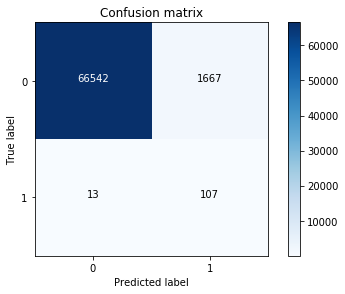

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_undersample, y_undersample)
pred = lr_model.predict(X_test)

class_names = [0,1]
print(np.sum(y_test))
print(plot_confusion_matrix(confusion_matrix(y_test, pred), classes=class_names, title='Confusion matrix'))
print(classification_report(y_test, pred))

120
None
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     68209
          1       0.09      0.90      0.17       120

avg / total       1.00      0.98      0.99     68329



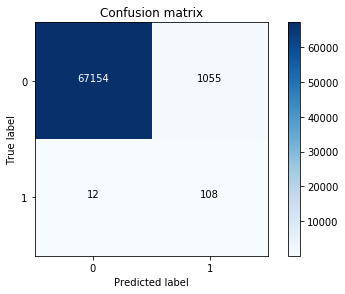

In [70]:
# using grid search recommended parameters

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lr_model = LogisticRegression(C=0.1, penalty='l1')
lr_model.fit(X_undersample, y_undersample)
pred = lr_model.predict(X_test)

class_names = [0,1]
print(np.sum(y_test))
print(plot_confusion_matrix(confusion_matrix(y_test, pred), classes=class_names, title='Confusion matrix'))
print(classification_report(y_test, pred))

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf_model = RandomForestClassifier()
rf_model.fit(X_undersample, y_undersample)
pred = rf_model.predict(X_test)

class_names = [0,1]
print(np.sum(y_test))
print(plot_confusion_matrix(confusion_matrix(y_test, pred), classes=class_names, title='Confusion matrix'))
print(classification_report(y_test, pred))

TypeError: __init__() got an unexpected keyword argument 'C'

In [68]:
# grid searching logistic regression
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_undersample,y_undersample)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.9312714776632303


In [ ]:
# grid searching random forest
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rf=RandomForestClassifier()
rf_cv=GridSearchCV(rf,param_grid,cv=10)
rf_cv.fit(X_undersample,y_undersample)

print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

In [ ]:
# grid searching random forest
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5],
    'criterion' :['gini']
}
rf=RandomForestClassifier()
rf_cv=GridSearchCV(rf,param_grid,cv=10)
rf_cv.fit(X_undersample,y_undersample)

print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)